In [1]:
import pooch

url = "https://github.com/LaPoGeoMar/Proj_Modelagem_Pellet/releases/download"
version = "v0.1.0"

fname = pooch.retrieve(
    url=f"{url}/{version}/model_tides_only.nc4",
    known_hash="sha256:b6941a8e4cf158790d899e00e644d6c6a6dcaf28128623467699e5a3b23417cd",
)

In [2]:
import xarray as xr

ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:     (m: 138, n: 218, time: 8772)
Coordinates:
    Layer       float32 ...
    latitude    (m, n) float32 ...
    longitude   (m, n) float32 ...
  * m           (m) float32 -48.87 -48.87 -48.86 -48.85 ... -47.53 -47.52 -47.51
  * n           (n) float32 -28.62 -28.62 -28.61 -28.6 ... -26.48 -26.47 -26.47
  * time        (time) datetime64[ns] 2021-01-01 ... 2022-01-01
Data variables:
    velocity_x  (time, m, n) float32 ...
    velocity_y  (time, m, n) float32 ...
    waterlevel  (time, m, n) float32 ...
Attributes: (12/25)
    title:                         NetCDF created from NEFIS-file trim-sc_fl_...
    institution:                   
    source:                        Delft3D trim file
    history:                       Wed Mar 15 14:42:40 2023: ncks -4 -L 1 mod...
    references:                    http://svn.oss.deltares.nl
    email:                         
    ...                            ...
    geospatial_lon_units:          dergees_east
    geospatial_vertical_min:       2.2039968967437744
    geospatial_vertical_max:       547.0967407226562
    geospatial_vertical_units:     m
    geospatial_vertical_positive:  down
    NCO:                           netCDF Operators version 5.1.5 (Homepage =...

In [3]:
bbox = (
    ds["longitude"].min().to_numpy()[()],
    ds["longitude"].max().to_numpy()[()],
    ds["latitude"].min().to_numpy()[()],
    ds["latitude"].max().to_numpy()[()],
)

print(
    f"Bounding box: {bbox}"
)  # Pode ser diferente da grade original devido aos cortes.

Bounding box: (-48.86960220336914, -47.509605407714844, -28.620038986206055, -26.47003936767578)


In [4]:
url = "https://github.com/LaPoGeoMar/Proj_Modelagem_Pellet/releases/download"
version = "v0.1.0"

fname = pooch.retrieve(
    url=f"{url}/{version}/bathymetry.nc4",
    known_hash="sha256:95e0a54db26373ab1a436eda1abf3a7bc24237e2424f0ab063a4f3a1bd2079ed",
)

bathy = xr.open_dataset(fname)

<IPython.core.display.Javascript object>


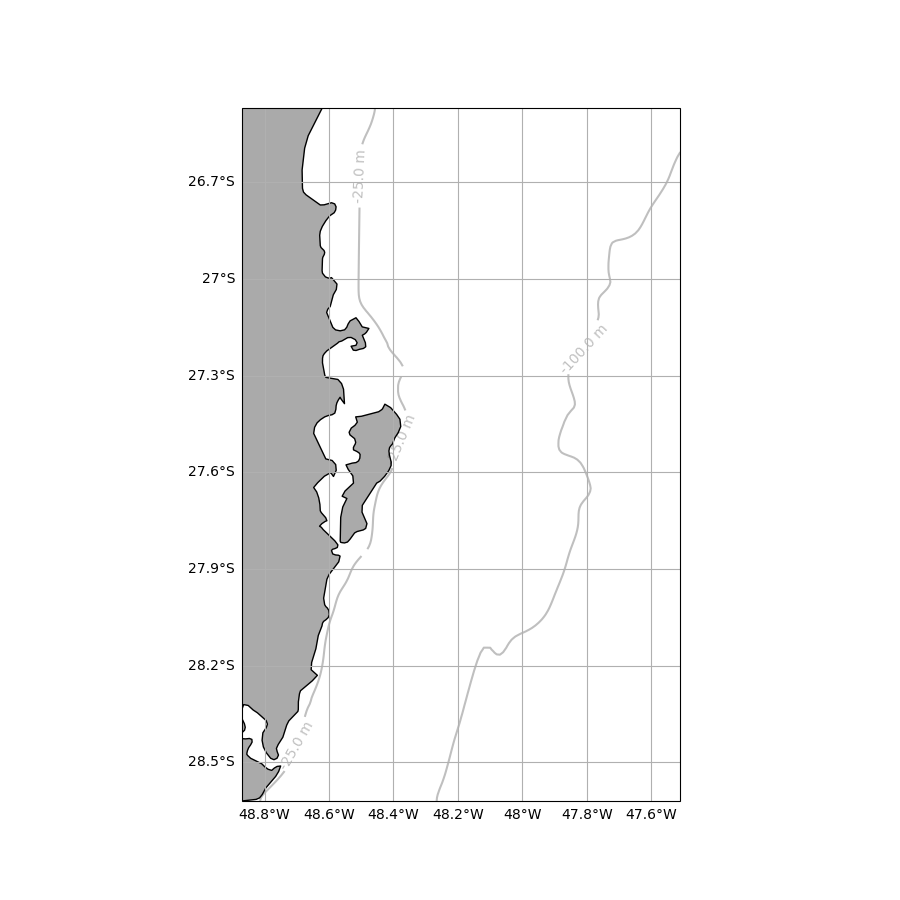

In [5]:
%matplotlib notebook
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

# Bounding box with some spacing to spare.
dx = dy = 1.5

# Coastline
feature = NaturalEarthFeature(
    name="coastline",
    category="physical",
    scale="10m",
    edgecolor="#000000",
    facecolor="#AAAAAA",
)

# Bathymetry
levels = [-100, -25]

# Figure
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(
    figsize=(9, 9),
    subplot_kw={
        "projection": projection,
    },
)
ax.set_extent(bbox)
ax.add_feature(feature, zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


def fmt(x):
    s = f"{x:.1f}"
    return rf"{s} m"


cs = ax.contour(
    bathy["longitude"],
    bathy["latitude"],
    -bathy["depth"],
    levels=levels,
    colors="black",
    alpha=0.25,
    zorder=0,
    linestyles="-",
)

# plota grade
# x, y = np.meshgrid(ds["m"], ds["n"])
# kw = {"marker": ".", "linestyle": "-", "alpha": 0.25, "color": "darkgray"}
# ax.plot(x, y, **kw, zorder=0)

ax.clabel(cs, cs.levels, inline=True, fmt=fmt, fontsize=10);

## Grid

In [6]:
grid_spacing = 0.01
m = np.abs(np.diff(bathy["m"])[1:-1] - grid_spacing)
n = np.abs(np.diff(bathy["n"])[1:-1] - grid_spacing)

if np.allclose(m, 0.0, atol=1e-05) and np.allclose(n, 0.0, atol=1e-05):
    print(f"the grid spacing is {grid_spacing} degrees.")

the grid spacing is 0.01 degrees.
